In [1]:
#-------------------------- Standard Imports --------------------------#
%reload_ext autoreload
%autoreload 2
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import acr
import warnings
import pingouin as pg
from scipy.stats import shapiro, normaltest
import os
from pathlib import Path

import pingouin as pg

warnings.filterwarnings('ignore')
probe_ord = ['NNXr', 'NNXo']
#hue_ord = [NNXR_GRAY, MAIN_COLOR]

#--------------------------------- Import Publication Functions ---------------------------------#
pub_utils = acr.utils.import_publication_functions('/Users/driessen2@ad.wisc.edu/kdriessen/gh_master/PUBLICATION__ACR/pub_utils.py', 'pub_utils')
from pub_utils import *
data_agg = acr.utils.import_publication_functions('/Users/driessen2@ad.wisc.edu/kdriessen/gh_master/PUBLICATION__ACR/data_agg.py', 'data_agg')
from data_agg import *

#--------------------------------- Plotting Setup ---------------------------------#
import pubplots as pp
style_path = '/Users/driessen2@ad.wisc.edu/kdriessen/acr_dev/acr/src/acr/plot_styles/acrvec_labels.mplstyle'
plt.rcdefaults()
plt.style.use(style_path)

In [2]:
nbroot = os.path.join(PAPER_FIGURE_ROOT, 'response_to_review', 'haloN')
Path(nbroot).mkdir(parents=True, exist_ok=True)

# SWA in Rebound

In [3]:
COMP_ANALYSIS = 'swa_reb'
results = {}

In [4]:
src_dats = []

In [ ]:
SUBJECT_TYPE = 'som'
MAIN_EXP = 'swi'
cons = []
ops = []
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(f'../src_dat/{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [9]:
SUBJECT_TYPE = 'acr'
MAIN_EXP = 'swi'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(f'../src_dat/{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [10]:
SUBJECT_TYPE = 'halo'
MAIN_EXP = 'swisin'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(f'../src_dat/{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [11]:
src = pd.concat(src_dats)

In [12]:
cons = np.concatenate(cons)
ops = np.concatenate(ops)
df = pd.DataFrame({
    'swa_ratio': np.concatenate([results[v] for v in results.keys()]),
    'group': ['som']*len(results['som']) + ['acr']*len(results['acr']) + ['halo']*len(results['halo'])
})

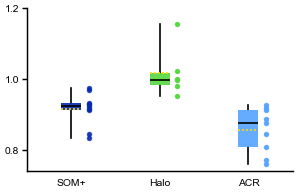

In [ ]:


with pp.destination("figma", style="/Users/driessen2@ad.wisc.edu/kdriessen/acr_dev/acr/src/acr/plot_styles/acrvec_labels.mplstyle"):
    f, ax = plt.subplots(1, 1, figsize=pp.scale(2.1, 1.4))
    # Boxplots for all three conditions

    ax, box = acr.plots.add_boxplot(ax, results['som'], positions=[0.4], widths=0.0225, color=SOM_BLUE, means=True, mean_color='gold', mean_linewidth=2.5, mean_linestyle='--', mean_dashes=(1.2, 1.2), alpha=0.9, whisker_linewidth=2.5, median_linewidth=2.5)
    ax = acr.plots.add_data_points(ax, results['som'], x_pos=0.42, color=SOM_BLUE, alpha=0.8, s=25, zorder=202)

    ax, box2 = acr.plots.add_boxplot(ax, results['halo'], positions=[0.5], widths=0.0225, color=HALO_GREEN, means=True, mean_color='gold', mean_linewidth=2.5, mean_linestyle='--', mean_dashes=(1.2, 1.2), alpha=0.9, whisker_linewidth=2.5, median_linewidth=2.5)
    ax = acr.plots.add_data_points(ax, results['halo'], x_pos=0.52, color=HALO_GREEN, alpha=0.9, s=25, zorder=203)

    ax, box3 = acr.plots.add_boxplot(ax, results['acr'], positions=[0.6], widths=0.0225, color=ACR_BLUE, means=True, mean_color='gold', mean_linewidth=2.5, mean_linestyle='--', mean_dashes=(1.2, 1.2), alpha=0.9, whisker_linewidth=2.5, median_linewidth=2.5)
    ax = acr.plots.add_data_points(ax, results['acr'], x_pos=0.62, color=ACR_BLUE, alpha=0.9, s=25, zorder=204)

    ax.set_xlim(0.35, 0.65)
    #ax.set_ylim(0.3, 0.8)
    ax.set_yticks([0.8, 1, 1.2])
    ax.set_xticklabels(['SOM+', 'Halo', 'ACR'])


    #ax.axhline(0.5, color='red', linestyle='--')

    plt.tight_layout()
    plt.show()
    f.savefig(figpath, dpi=600, bbox_inches='tight')

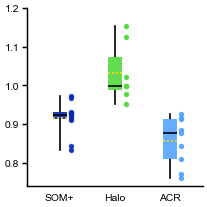

In [13]:
figname = 'ANOVA_swa_in_rebound_all_groups'
figpath = os.path.join(nbroot, f'{figname}.svg')

with pp.destination("figma", style="/Users/driessen2@ad.wisc.edu/kdriessen/acr_dev/acr/src/acr/plot_styles/acrvec_labels.mplstyle"):
    f, ax = plt.subplots(1, 1, figsize=pp.scale(1.5, 1.5))
    # Boxplots for all three conditions

    ax, box = acr.plots.add_boxplot(ax, results['som'], positions=[0.45], widths=0.0125, color=SOM_BLUE, means=True, mean_color='gold', mean_linewidth=2.5, mean_linestyle='--', mean_dashes=(1.2, 1.2), alpha=0.9, whisker_linewidth=2.5, median_linewidth=2.5)
    ax = acr.plots.add_data_points(ax, results['som'], x_pos=0.46, color=SOM_BLUE, alpha=0.8, s=25, zorder=202)

    ax, box2 = acr.plots.add_boxplot(ax, results['halo'], positions=[0.5], widths=0.0125, color=HALO_GREEN, means=True, mean_color='gold', mean_linewidth=2.5, mean_linestyle='--', mean_dashes=(1.2, 1.2), alpha=0.9, whisker_linewidth=2.5, median_linewidth=2.5)
    ax = acr.plots.add_data_points(ax, results['halo'], x_pos=0.51, color=HALO_GREEN, alpha=0.9, s=25, zorder=203)

    ax, box3 = acr.plots.add_boxplot(ax, results['acr'], positions=[0.55], widths=0.0125, color=ACR_BLUE, means=True, mean_color='gold', mean_linewidth=2.5, mean_linestyle='--', mean_dashes=(1.2, 1.2), alpha=0.9, whisker_linewidth=2.5, median_linewidth=2.5)
    ax = acr.plots.add_data_points(ax, results['acr'], x_pos=0.56, color=ACR_BLUE, alpha=0.9, s=25, zorder=204)

    ax.set_xlim(0.42, 0.58)
    #ax.set_ylim(0.3, 0.8)
    ax.set_yticks([ 0.8, 0.9, 1, 1.1, 1.2])
    ax.set_xticklabels(['SOM+', 'Halo', 'ACR'])


    #ax.axhline(0.5, color='red', linestyle='--')

    plt.tight_layout()
    plt.show()
    f.savefig(figpath, dpi=600, bbox_inches='tight')

## Stats

In [14]:
# Power analysis on OFF induction effect
tt = pg.ttest(cons, ops, paired=True)
pg.power_ttest(d=tt['cohen-d'], n=6, alpha=0.05, contrast='paired')

array([0.10942507])

In [15]:
# Normality Checks
from scipy.stats import shapiro
_, p = shapiro(results['som'])
print(f'p-value for som: {p}')

_, p = shapiro(results['acr'])
print(f'p-value for acr: {p}')

_, p = shapiro(results['halo'])
print(f'p-value for halo: {p}')

p-value for som: 0.10079592844123353
p-value for acr: 0.24807214643329162
p-value for halo: 0.1335254983467325


In [16]:
homo = pg.homoscedasticity(dv='swa_ratio', group='group', data=df)
homo

,W,pval,equal_var
levene,0.704184,0.504864,True


In [17]:
anov = pg.anova(dv='swa_ratio', between='group', data=df)
anov

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,23,16.742307,0.000033,0.592809


In [18]:
acr.stats.write_stats_result(
    figname, 
    'ANOVA',
    test_statistic=anov['F'][0],
    p_value=anov['p-unc'][0],
    effect_size_method='np2',
    effect_size=anov['np2'][0],
    review=True,
)

In [19]:
pwt = pg.pairwise_tukey(dv='swa_ratio', between='group', data=df)
pwt

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,acr,halo,0.856550,1.032758,-0.176209,0.030693,-5.741017,0.000022,-2.414969
1,acr,som,0.856550,0.915846,-0.059296,0.027984,-2.118967,0.107999,-1.040827
2,halo,som,1.032758,0.915846,0.116912,0.030014,3.895255,0.002029,1.855325


In [20]:
conds = ['ACR-v-HALO__swa-in-reb', 'ACR-v-SOM__swa-in-reb', 'HALO-v-SOM__swa-in-reb']
for i, stat_name in enumerate(conds):
    acr.stats.write_stats_result(stat_name, 'pairwise_tukey', pwt['T'][i], pwt['p-tukey'][i], 'g', pwt['hedges'][i], review=True)

### POWER Calculations

In [18]:
offs = src.query('sub_type != "halo"')
sp = src.query('sub_type == "som"')
af = src.query('sub_type == "acr"')

In [19]:
optrode_relative_values = offs['off_induction'].values/offs['contra_control'].values

In [20]:
sp_rels = sp['off_induction'].values/sp['contra_control'].values
af_rels = af['off_induction'].values/af['contra_control'].values

In [21]:
# ALL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = offs['off_induction'].values / offs['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.1122418262687054
SD of fractional change: 0.06101016410605415
Within-subject effect size dz: -1.8397233954918577
0.9445663076359921 4.563369122892295 5.367676561453177


In [22]:
# SOM PARIETAL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = sp['off_induction'].values / sp['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.08415405308338027
SD of fractional change: 0.045569771563162755
Within-subject effect size dz: -1.8467078108288761
0.9459901602160673 4.546576628894856 5.345312746298336


In [23]:
# ACR FRONTAL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = af['off_induction'].values / af['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.1434504631412889
SD of fractional change: 0.06290453515991774
Within-subject effect size dz: -2.280447073912953
0.9917565494981255 3.7824833999967225 4.334385707079403


# Firing Rate

In [24]:
COMP_ANALYSIS = 'fr_reb'
results = {}

In [25]:
src_dats = []

In [26]:
SUBJECT_TYPE = 'som'
MAIN_EXP = 'swi'
cons = []
ops = []
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [27]:
SUBJECT_TYPE = 'acr'
MAIN_EXP = 'swi'
cons = []
ops = []
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
subjects, exps = remove_subject('ACR_16', subjects, exps)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [28]:
SUBJECT_TYPE = 'halo'
MAIN_EXP = 'swisin'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [29]:
src = pd.concat(src_dats)

In [30]:
cons = np.concatenate(cons)
ops = np.concatenate(ops)
df = pd.DataFrame({
    'swa_ratio': np.concatenate([results[v] for v in results.keys()]),
    'group': ['som']*len(results['som']) + ['acr']*len(results['acr']) + ['halo']*len(results['halo'])
})

### POWER Calculations

In [32]:
# Power analysis on OFF induction effect
tt = pg.ttest(cons, ops, paired=True)
pg.power_ttest(d=tt['cohen-d'], n=6, alpha=0.05, contrast='paired')

array([0.9384583])

In [33]:
offs = src.query('sub_type != "halo"')
sp = src.query('sub_type == "som"')
af = src.query('sub_type == "acr"')

In [34]:
optrode_relative_values = offs['off_induction'].values/offs['contra_control'].values

In [35]:
sp_rels = sp['off_induction'].values/sp['contra_control'].values
af_rels = af['off_induction'].values/af['contra_control'].values

In [36]:
# ALL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = offs['off_induction'].values / offs['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.13658592558778412
SD of fractional change: 0.11106136055906264
Within-subject effect size dz: -1.2298239900919228
0.6756468343458784 7.333320938025134 9.083774271399598


In [37]:
# SOM PARIETAL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = sp['off_induction'].values / sp['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.09920785967376088
SD of fractional change: 0.10800847124344341
Within-subject effect size dz: -0.9185192469778913
0.4444964164294007 11.371701467696669 14.511708254679236


In [38]:
# ACR FRONTAL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = af['off_induction'].values / af['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.1833085079803132
SD of fractional change: 0.10230275394677187
Within-subject effect size dz: -1.791823786832646
0.9339744139298981 4.683859520271265 5.528258030231224


# STTC

In [9]:
COMP_ANALYSIS = 'sttc'
results = {}

In [10]:
src_dats = []

In [11]:
SUBJECT_TYPE = 'som'
MAIN_EXP = 'swi'
cons = []
ops = []
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop - scon
src_dats.append(src)

In [7]:
SUBJECT_TYPE = 'acr'
MAIN_EXP = 'swi'
cons = []
ops = []
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
subjects, exps = remove_subject('ACR_16', subjects, exps)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop - scon
src_dats.append(src)

In [8]:
SUBJECT_TYPE = 'halo'
MAIN_EXP = 'swisin'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop - scon
src_dats.append(src)

In [44]:
src = pd.concat(src_dats)

In [45]:
cons = np.concatenate(cons)
ops = np.concatenate(ops)
df = pd.DataFrame({
    'swa_ratio': np.concatenate([results[v] for v in results.keys()]),
    'group': ['som']*len(results['som']) + ['acr']*len(results['acr']) + ['halo']*len(results['halo'])
})

### POWER Calculations

In [46]:
# Power analysis on OFF induction effect
tt = pg.ttest(cons, ops, paired=True)
pg.power_ttest(d=tt['cohen-d'], n=6, alpha=0.05, contrast='paired')

array([0.20076852])

In [47]:
offs = src.query('sub_type != "halo"')
sp = src.query('sub_type == "som"')
af = src.query('sub_type == "acr"')

In [48]:
optrode_relative_values = offs['off_induction'].values - offs['contra_control'].values

In [49]:
sp_rels = sp['off_induction'].values - sp['contra_control'].values
af_rels = af['off_induction'].values - af['contra_control'].values

In [50]:
# ALL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = offs['off_induction'].values - offs['contra_control'].values
R = optrode_relative_values  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.01911404128944929
SD of fractional change: 0.018402622229989576
Within-subject effect size dz: -1.038658569989029
0.5363629178086688 9.37405718422249 11.827740328209703


In [51]:
# SOM PARIETAL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = sp['off_induction'].values - sp['contra_control'].values
R = optrode_relative_values  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.024814123214304838
SD of fractional change: 0.02036501877436219
Within-subject effect size dz: -1.2184679763489188
0.6678644849324441 7.4279471068544085 9.211031613389009


In [52]:
# ACR FRONTAL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = af['off_induction'].values - af['contra_control'].values
R = optrode_relative_values  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.01198893888337985
SD of fractional change: 0.013593636447026167
Within-subject effect size dz: -0.8819522965837907
0.4167826044655643 12.14994405425308 15.556748495048568


# Rebound Peak

In [53]:
COMP_ANALYSIS = 'reb_peak'
results = {}

In [54]:
src_dats = []

In [55]:
SUBJECT_TYPE = 'som'
MAIN_EXP = 'swi'
cons = []
ops = []
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [56]:
SUBJECT_TYPE = 'acr'
MAIN_EXP = 'swi'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
subjects, exps = remove_subject('ACR_16', subjects, exps)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [57]:
SUBJECT_TYPE = 'halo'
MAIN_EXP = 'swisin'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [58]:
src = pd.concat(src_dats)

In [59]:
cons = np.concatenate(cons)
ops = np.concatenate(ops)
df = pd.DataFrame({
    'swa_ratio': np.concatenate([results[v] for v in results.keys()]),
    'group': ['som']*len(results['som']) + ['acr']*len(results['acr']) + ['halo']*len(results['halo'])
})

## Stats

### POWER Calculations

In [62]:
# Power analysis on OFF induction effect
tt = pg.ttest(cons, ops, paired=True)
pg.power_ttest(d=tt['cohen-d'], n=6, alpha=0.05, contrast='paired')

array([0.5864367])

In [63]:
offs = src.query('sub_type != "halo"')
sp = src.query('sub_type == "som"')
af = src.query('sub_type == "acr"')

In [64]:
optrode_relative_values = offs['off_induction'].values/offs['contra_control'].values

In [65]:
sp_rels = sp['off_induction'].values/sp['contra_control'].values
af_rels = af['off_induction'].values/af['contra_control'].values

In [66]:
# ALL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = offs['off_induction'].values / offs['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.14530793759313654
SD of fractional change: 0.07365254339814209
Within-subject effect size dz: -1.9728841787261617
0.9670172582885438 4.272956553919908 4.981666863222923


In [67]:
# SOM PARIETAL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = sp['off_induction'].values / sp['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.140352742350421
SD of fractional change: 0.0695894598868639
Within-subject effect size dz: -2.0168678213425073
0.9725119804675982 4.189261027860924 4.870744798530044


In [68]:
# ACR FRONTAL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = af['off_induction'].values / af['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.15150193164653092
SD of fractional change: 0.08287956071445511
Within-subject effect size dz: -1.8279770107433413
0.9421039830572752 4.592043649102179 5.405875059149222


# Rebound Initiation

In [69]:
COMP_ANALYSIS = 'rebound_init'
results = {}

In [70]:
src_dats = []

In [71]:
SUBJECT_TYPE = 'som'
MAIN_EXP = 'swi'
cons = []
ops = []
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [72]:
SUBJECT_TYPE = 'acr'
MAIN_EXP = 'swi'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
subjects, exps = remove_subject('ACR_16', subjects, exps)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [73]:
SUBJECT_TYPE = 'halo'
MAIN_EXP = 'swisin'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [74]:
src = pd.concat(src_dats)

In [75]:
cons = np.concatenate(cons)
ops = np.concatenate(ops)
df = pd.DataFrame({
    'swa_ratio': np.concatenate([results[v] for v in results.keys()]),
    'group': ['som']*len(results['som']) + ['acr']*len(results['acr']) + ['halo']*len(results['halo'])
})

### POWER Calculations

In [76]:
# Power analysis on OFF induction effect
tt = pg.ttest(cons, ops, paired=True)
pg.power_ttest(d=tt['cohen-d'], n=6, alpha=0.05, contrast='paired')

array([0.50647123])

In [77]:
offs = src.query('sub_type != "halo"')
sp = src.query('sub_type == "som"')
af = src.query('sub_type == "acr"')

In [78]:
optrode_relative_values = offs['off_induction'].values/offs['contra_control'].values

In [79]:
sp_rels = sp['off_induction'].values/sp['contra_control'].values
af_rels = af['off_induction'].values/af['contra_control'].values

In [80]:
# ALL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = offs['off_induction'].values / offs['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.12664083830346604
SD of fractional change: 0.12259214289661197
Within-subject effect size dz: -1.0330257332255668
0.5320738733004026 9.4522236615584 11.932804313804558


In [81]:
# SOM PARIETAL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = sp['off_induction'].values / sp['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.07686517425365827
SD of fractional change: 0.0944849926257512
Within-subject effect size dz: -0.8135172805496862
0.3659839614542982 13.901945552501898 17.90839143255321


In [82]:
# ACR FRONTAL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = af['off_induction'].values / af['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.18886041836572573
SD of fractional change: 0.13060139386443745
Within-subject effect size dz: -1.4460827160984238
0.8060024797863061 5.941515194507993 7.212813231372765


# Rebound Termination

In [83]:
COMP_ANALYSIS = 'rebound_term'
results = {}

In [84]:
src_dats = []

In [85]:
SUBJECT_TYPE = 'som'
MAIN_EXP = 'swi'
cons = []
ops = []
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [86]:
SUBJECT_TYPE = 'acr'
MAIN_EXP = 'swi'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
subjects, exps = remove_subject('ACR_16', subjects, exps)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [87]:
SUBJECT_TYPE = 'halo'
MAIN_EXP = 'swisin'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(f'./{COMP_ANALYSIS}/{SUBJECT_TYPE}.csv')
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [88]:
src = pd.concat(src_dats)

In [89]:
cons = np.concatenate(cons)
ops = np.concatenate(ops)
df = pd.DataFrame({
    'swa_ratio': np.concatenate([results[v] for v in results.keys()]),
    'group': ['som']*len(results['som']) + ['acr']*len(results['acr']) + ['halo']*len(results['halo'])
})

### POWER Calculations

In [90]:
# Power analysis on OFF induction effect
tt = pg.ttest(cons, ops, paired=True)
pg.power_ttest(d=tt['cohen-d'], n=6, alpha=0.05, contrast='paired')

array([0.51062158])

In [91]:
offs = src.query('sub_type != "halo"')
sp = src.query('sub_type == "som"')
af = src.query('sub_type == "acr"')

In [92]:
optrode_relative_values = offs['off_induction'].values/offs['contra_control'].values

In [93]:
sp_rels = sp['off_induction'].values/sp['contra_control'].values
af_rels = af['off_induction'].values/af['contra_control'].values

In [94]:
# ALL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = offs['off_induction'].values / offs['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.1264948008189467
SD of fractional change: 0.09536815219398871
Within-subject effect size dz: -1.3263841010743624
0.738316021891295 6.626094784980028 8.132777133469965


In [95]:
# SOM PARIETAL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = sp['off_induction'].values / sp['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.1269076363262123
SD of fractional change: 0.08767605662919557
Within-subject effect size dz: -1.4474605862229535
0.8067116606901529 5.934626855561004 7.203560750986847


In [96]:
# ACR FRONTAL OFF SUBJECTS
# 1) Build fractional change metric R - 1
optrode_relative_values = af['off_induction'].values / af['contra_control'].values
R = optrode_relative_values - 1  # fractional change; 0 = no difference

# 2) Within-subject effect size (Cohen's dz) for this metric
mean_R = np.mean(R)
sd_R = np.std(R, ddof=1)  # sample SD
dz = mean_R / sd_R

print("Mean fractional change (R-1):", mean_R)
print("SD of fractional change:", sd_R)
print("Within-subject effect size dz:", dz)

pn, p80, p90 = acr.stats.compute_power(dz, n=6)
print(pn, p80, p90)

Mean fractional change (R-1): -0.12597875643486478
SD of fractional change: 0.11047222197638902
Within-subject effect size dz: -1.1403659144448994
0.612390006643158 8.158806522905046 10.193898431857455
